In [1]:
import os
import sys
import numpy as np
import cv2

from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt
from skimage.restoration import inpaint

In [2]:
path= Path(r"C:\Users\rodzi\Pictures\Commemorating_engagement\20231230 - [roberryarts]-Commemorating.JoshuaRodrigues._.JoleneCheok.Dec.2023.[Robert_s.Cam]")
path

WindowsPath('C:/Users/rodzi/Pictures/Commemorating_engagement/20231230 - [roberryarts]-Commemorating.JoshuaRodrigues._.JoleneCheok.Dec.2023.[Robert_s.Cam]')

In [3]:
file_path = path.joinpath("20231230 - [roberryarts]-Commemorating.JoshuaRodrigues._.JoleneCheok.Dec.2023.[Robert_s.Cam] - Pic 0001.jpg")
file_path

WindowsPath('C:/Users/rodzi/Pictures/Commemorating_engagement/20231230 - [roberryarts]-Commemorating.JoshuaRodrigues._.JoleneCheok.Dec.2023.[Robert_s.Cam]/20231230 - [roberryarts]-Commemorating.JoshuaRodrigues._.JoleneCheok.Dec.2023.[Robert_s.Cam] - Pic 0001.jpg')

In [4]:
file = file_path.absolute().as_posix()

In [15]:
img= cv2.imread(file)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# cv2.imshow("image",img)

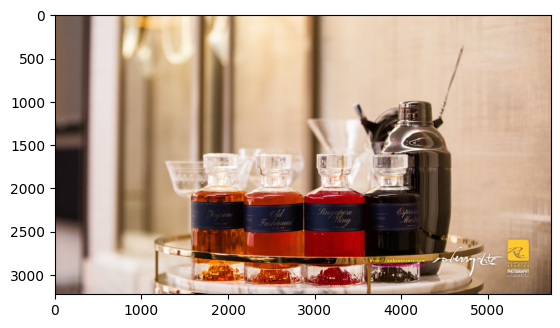

In [16]:
plt.imshow(img)
plt.show()

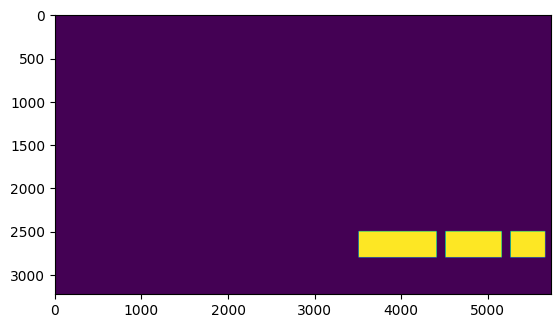

In [12]:
mask = np.zeros(img.shape)


img.shape
# # Set the pixels where the logo is to 1
mask[2500:2800, 3500:4400]=1
mask[2500:2800, 4500:5150]=1
mask[2500:2800, 5250:5650]=1

mask = np.float32(mask)

gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_mask)
plt.show()

In [32]:
# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(img, 
                                                mask)


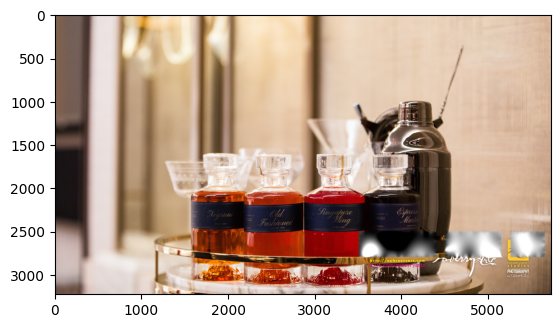

In [33]:
plt.imshow(image_logo_removed)
plt.show()

In [18]:
inpaintRadius = 10
inpaintMethod = cv2.INPAINT_TELEA
result = cv2.inpaint(img, gray_mask, inpaintRadius, inpaintMethod)
# cv2.imshow("Inpaint Result", result)
cv2.waitKey(0)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\photo\src\inpaint.cpp:771: error: (-210:Unsupported format or combination of formats) The mask must be 8-bit 1-channel image in function 'icvInpaint'


In [ ]:
cv2.imwrite("test.jpg", result) 

In [29]:
mask.shape

(3223, 5729, 3)

In [7]:
# new_img = cv2.inpaint(img, inpaintMask, inpaintRadius, flags[, dst]) 

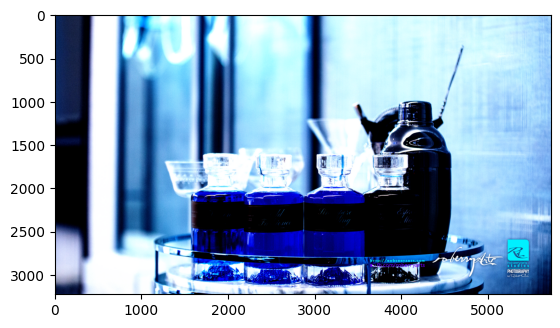

In [8]:
alpha = 2.0
beta = -160

new = alpha * img + beta
new = np.clip(new, 0, 255).astype(np.uint8)

plt.imshow(new)
plt.show()

In [9]:
def areaFilter(minArea, inputImage):

    # Perform an area filter on the binary blobs:
    componentsNumber, labeledImage, componentStats, componentCentroids = \
    cv2.connectedComponentsWithStats(inputImage, connectivity=4)

    # Get the indices/labels of the remaining components based on the area stat
    # (skip the background component at index 0)
    remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]

    # Filter the labeled pixels based on the remaining labels,
    # assign pixel intensity to 255 (uint8) for the remaining pixels
    filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')

    return filteredImage

C:\Users\rodzi\AppData\Local\Temp\ipykernel_9628\1671733332.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imgFloat = img.astype(np.float) / 255.


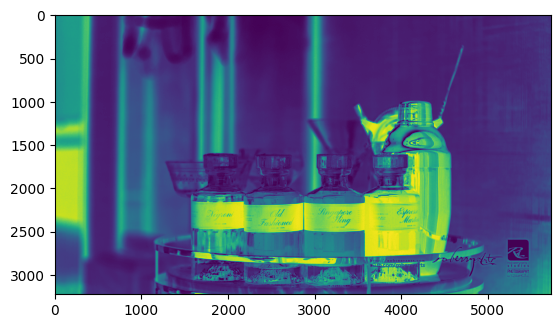

In [10]:
originalImg = img.copy()

# Convert to float and divide by 255:
imgFloat = img.astype(np.float) / 255.

# Calculate channel K:
kChannel = 1 - np.max(imgFloat, axis=2) 
plt.imshow(kChannel)
plt.show()

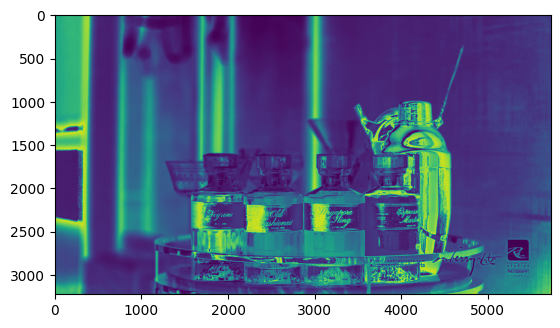

In [11]:
# Apply a contrast/brightness adjustment on Channel K:
alpha = 0
beta = 1.2
adjustedK = cv2.normalize(kChannel, None, alpha, beta, cv2.NORM_MINMAX, cv2.CV_32F)

# Convert back to uint 8:
adjustedK = (255*adjustedK).astype(np.uint8)

plt.imshow(adjustedK)
plt.show()

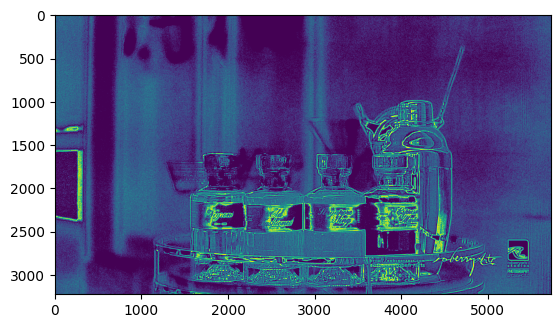

In [12]:
# Adaptive Thresholding on adjusted Channel K:
windowSize = 21
windowConstant = 11
binaryImg = cv2.adaptiveThreshold(adjustedK, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, windowSize, windowConstant)
plt.imshow(binaryImg)
plt.show()

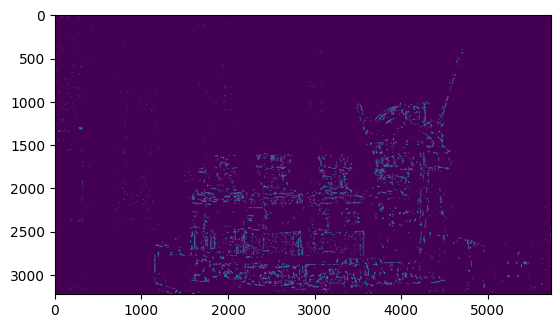

In [13]:
# Get the biggest blobs on the image:
minArea = 180
bigBlobs = areaFilter(minArea, binaryImg)

# Filter the smallest blobs on the image:
minArea = 20
smallBlobs = areaFilter(minArea, binaryImg)

# Let's try to isolate the text:
textMask = smallBlobs - bigBlobs

plt.imshow(textMask)
plt.show()

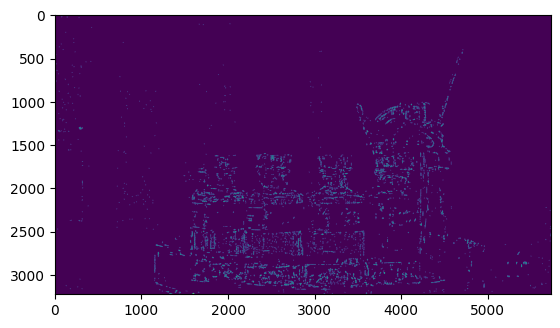

In [14]:
# Blur the mask a little bit to get a
# smoother inpanting result:
kernelSize = (3, 3)
textMask = cv2.GaussianBlur(textMask, kernelSize, cv2.BORDER_DEFAULT)
plt.imshow(textMask)
plt.show()

In [15]:
# Apply the inpaint method:
inpaintRadius = 10
inpaintMethod = cv2.INPAINT_TELEA
result = cv2.inpaint(originalImg, textMask, inpaintRadius, inpaintMethod)
# cv2.imshow("Inpaint Result", result)
cv2.waitKey(0)

-1

In [16]:
cv2.imwrite("test.jpg", result) 

True